# Task-01: Exploratory Data Analysis of Titanic dataset
# Author: Ferzeen Tahir

### Introduction:
#### Objective:
The aim of this Exploratory Data Analysis (EDA) is to gain insights from the Titanic dataset and understand the factors influencing passenger survival.
#### Dataset:
The dataset used for this analysis is the "Titanic" dataset from Seaborn, which contains information about passengers aboard the Titanic. The dataset consists of 891 rows and 15 columns. The dataset includes the following columns:

- **survived**: Survival status of the passenger (0 = No, 1 = Yes).
- **pclass**: Passenger class (1 = 1st class, 2 = 2nd class, 3 = 3rd class).
- **sex**: Gender of the passenger.
- **age**: Age of the passenger.
- **sibsp**: Number of siblings or spouses aboard the Titanic.
- **parch**: Number of parents or children aboard the Titanic.
- **fare**: Fare paid by the passenger.
- **embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).
- **class**: Passenger class (First, Second, Third).
- **who**: Passenger category (man, woman, child).
- **adult_male**: Boolean indicator for whether the passenger is an adult male.
- **deck**: Deck of the cabin.
- **embark_town**: Town of embarkation (Cherbourg, Queenstown, Southampton).
- **alive**: Survival status (same as survived, included for clarity).
- **alone**: Indicator if the passenger was alone or with family.


## Step-01: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Step-02: Load Data

In [2]:
# Load the Titanic dataset from seaborn
df = sns.load_dataset('titanic')

## Step-03: Data Inspection


In [3]:
# Display the first five rows of the dataset
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# Display the last five rows of the dataset
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [5]:
# Display the shape of the dataset (rows, columns)
df.shape

(891, 15)

In [6]:
# Provide a statistical summary of the numerical columns
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Display information about the dataset, including data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### Few Observations:
1. There are missing values in age, embarked and embarked_town columns.
2. 77% values are missing in deck column so we will have to drop that column.
3. Few columns have inappropriate data types.

## Step-04: Data Cleaning

### Handle Missing Values


In [8]:
# Detect missing values in the dataset
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
# Drop the 'deck' column due to excessive missing values
df.drop(columns= 'deck', inplace = True)

# Drop the 'embarked' and 'alive' column as it is redundant; we already have 'embarked_town' and 'survived' which serves the same purpose
df.drop(columns= ['embarked', 'alive'], inplace = True)

In [10]:
# Fill missing values in 'embark_town' with the mode
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

# Fill missing values in 'age' with the mean
df['age'] =df['age'].fillna(df['age'].mean())

### Removing Duplicates

In [11]:
# Detect duplicate rows in the dataset
df.duplicated().sum()

111

In [12]:
# Remove duplicate rows from dataset
df.drop_duplicates(inplace=True)

In [13]:
# Display the shape of the dataset after removing duplicates

df.shape

(780, 12)

### Changing Data Types

In [14]:
# Convert specific columns to 'category' data type
df['sex'] = df['sex'].astype('category')
df['who'] = df['who'].astype('category')
df['embark_town'] = df['embark_town'].astype('category')

In [15]:
# Display the updated information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 780 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     780 non-null    int64   
 1   pclass       780 non-null    int64   
 2   sex          780 non-null    category
 3   age          780 non-null    float64 
 4   sibsp        780 non-null    int64   
 5   parch        780 non-null    int64   
 6   fare         780 non-null    float64 
 7   class        780 non-null    category
 8   who          780 non-null    category
 9   adult_male   780 non-null    bool    
 10  embark_town  780 non-null    category
 11  alone        780 non-null    bool    
dtypes: bool(2), category(4), float64(2), int64(4)
memory usage: 47.7 KB


## Step-05: Feature Engineering

In [16]:
# Create'age_groups' column by binning the 'age' column 
bins = [0,5,10,15,19,40,80]
labels = ['0-5', '6-10', '11-15', '16-19', '20-40', '41-80']
df['age_groups'] = pd.cut(df['age'], bins = bins, labels = labels)

In [17]:
# Create 'family_size' column by combining 'sibsp' and 'parch'
df['family_size'] = df['sibsp'] + df['parch']

In [18]:
# Drop 'sibsp' and 'parch' columns as they are now combined into 'family_size'
df.drop(columns= ['sibsp', 'parch'], inplace = True)

# Again drop duplicates after Feature Engineering, if any
df.drop_duplicates(inplace=True)

In [19]:
# Display the first five rows of the dataset after Feature Engineering
df.head()

,survived,pclass,sex,age,fare,class,who,adult_male,embark_town,alone,age_groups,family_size
0,0,3,male,22.0,7.2500,Third,man,True,Southampton,False,20-40,1
1,1,1,female,38.0,71.2833,First,woman,False,Cherbourg,False,20-40,1
2,1,3,female,26.0,7.9250,Third,woman,False,Southampton,True,20-40,0
3,1,1,female,35.0,53.1000,First,woman,False,Southampton,False,20-40,1
4,0,3,male,35.0,8.0500,Third,man,True,Southampton,True,20-40,0


## Step-06: Univariate Analysis

survived
0    58.793325
1    41.206675
Name: count, dtype: float64


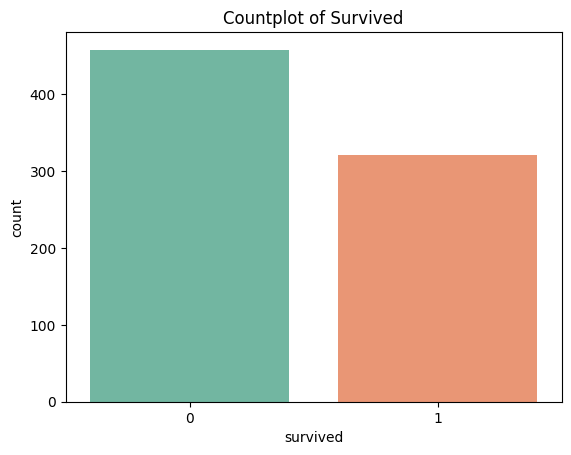

In [20]:
# Analyze the 'survived' column
print(df['survived'].value_counts() / len(df) * 100)

sns.countplot(df, x = 'survived', palette='Set2')
plt.title('Countplot of Survived')
plt.show()

pclass
3    51.732991
1    27.214377
2    21.052632
Name: count, dtype: float64


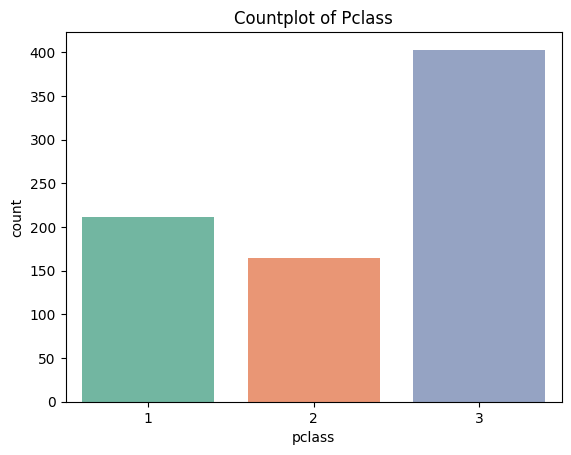

In [21]:
# Analyze the 'pclass' column
print(df['pclass'].value_counts() / len(df) * 100)

sns.countplot(df, x = 'pclass', palette='Set2')
plt.title('Countplot of Pclass')
plt.show()

sex
male      62.644416
female    37.355584
Name: count, dtype: float64


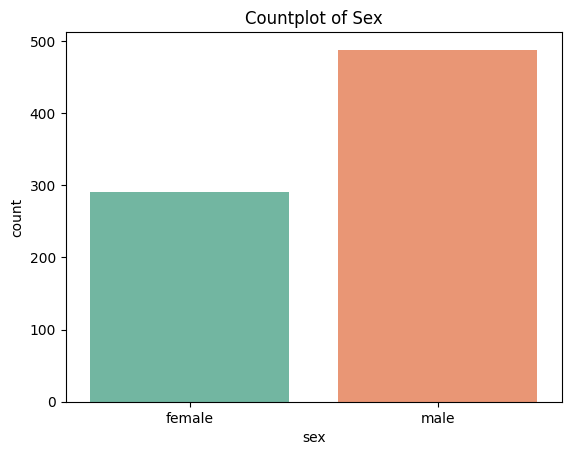

In [22]:
# Analyze the 'sex' column
print(df['sex'].value_counts() / len(df) * 100)

sns.countplot(df, x = 'sex', palette='Set2')
plt.title('Countplot of Sex')
plt.show()

who
man      57.509628
woman    31.964056
child    10.526316
Name: count, dtype: float64


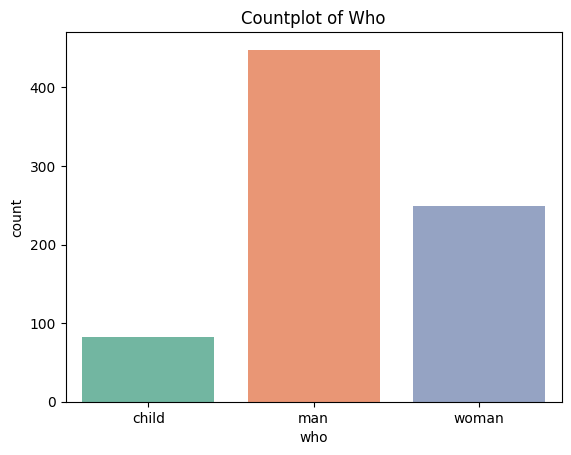

In [23]:
# Analyze the 'who' column
print(df['who'].value_counts() / len(df) * 100)

sns.countplot(df, x = 'who', palette='Set2')
plt.title('Countplot of Who')
plt.show()

embark_town
Southampton    72.785623
Cherbourg      19.768935
Queenstown      7.445443
Name: count, dtype: float64


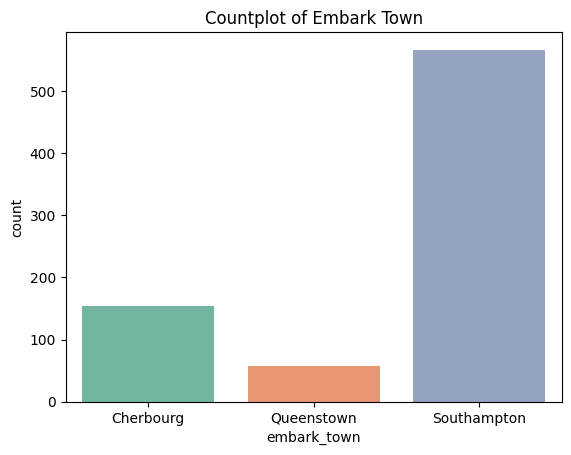

In [24]:
# Analyze the 'embark_town' column
print(df['embark_town'].value_counts() / len(df) * 100)

sns.countplot(df, x = 'embark_town', palette='Set2')
plt.title('Countplot of Embark Town')
plt.show()

alone
True     56.739409
False    43.260591
Name: count, dtype: float64


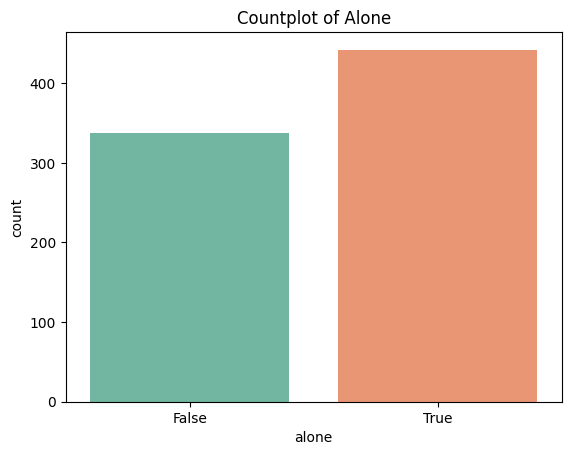

In [25]:
# Analyze the 'alone' column
print(df['alone'].value_counts() / len(df) * 100)

sns.countplot(df, x = 'alone', palette='Set2')
plt.title('Countplot of Alone')
plt.show()

age_groups
20-40    60.847240
41-80    18.870347
16-19     9.756098
0-5       5.519897
6-10      2.567394
11-15     2.439024
Name: count, dtype: float64


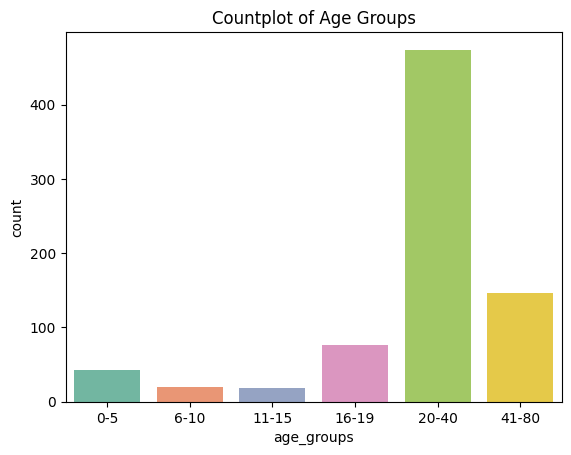

In [26]:
# Analyze the 'age_groups' column
print(df['age_groups'].value_counts() / len(df) * 100)

sns.countplot(df, x = 'age_groups', palette='Set2')
plt.title('Countplot of Age Groups')
plt.show()

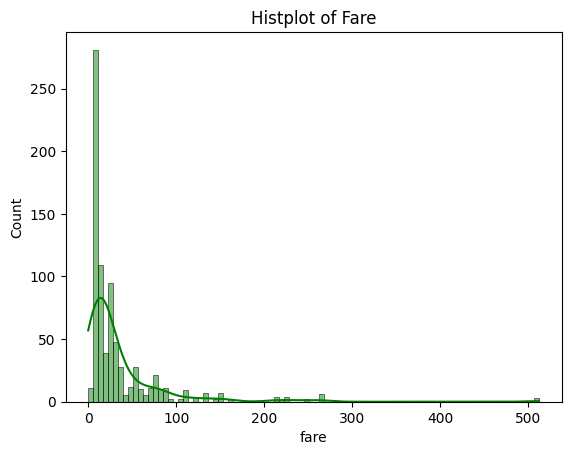

In [27]:
# Analyze the 'fare' column
sns.histplot(df, x = 'fare', kde = 'True', color='green')
plt.title('Histplot of Fare')
plt.show()

family_size
0     56.739409
1     19.768935
2     12.836970
3      3.594352
5      2.824134
4      1.668806
6      1.540436
7      0.770218
10     0.256739
Name: count, dtype: float64


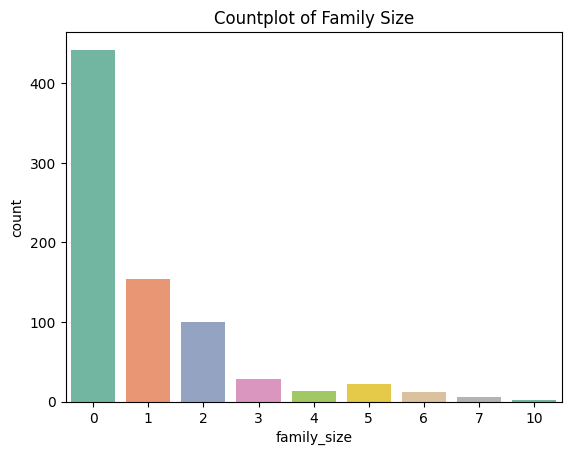

In [28]:
# Analyze the 'family_size' column
print(df['family_size'].value_counts() / len(df) * 100)

sns.countplot(df, x = 'family_size', palette='Set2')
plt.title('Countplot of Family Size')
plt.show()

### Few Observations:
1. 41.2% of passengers survived.
2. Mostly passengers were travelling in third class.
3. 57.5% of passengers were man, 31% were woman and 10.5% were children.
4. 72.7% passengers embarked from Southampton.
5. 56.7% of passengers were travelling alone.
6. Most passengers were between 20 to 40 years old.
7. It seems that there is an outlier in fare column.

## Step-07: Bivariate Analysis

survived     0     1
pclass              
1          9.9  17.3
2         10.4  10.7
3         38.5  13.2


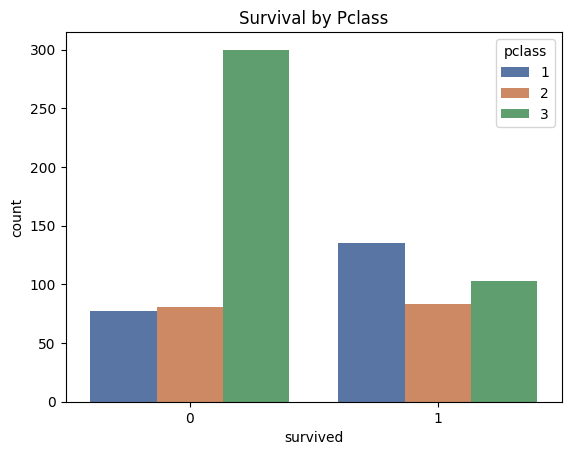

In [29]:
# Analyze survival with respect to 'pclass'
print(round((df.groupby('pclass')['survived'].value_counts() / len(df) * 100), 1).unstack())

sns.countplot(df, x = 'survived', hue = 'pclass', palette='deep')
plt.title('Survival by Pclass')
plt.show()

survived     0     1
sex                 
female     9.8  27.6
male      49.0  13.6


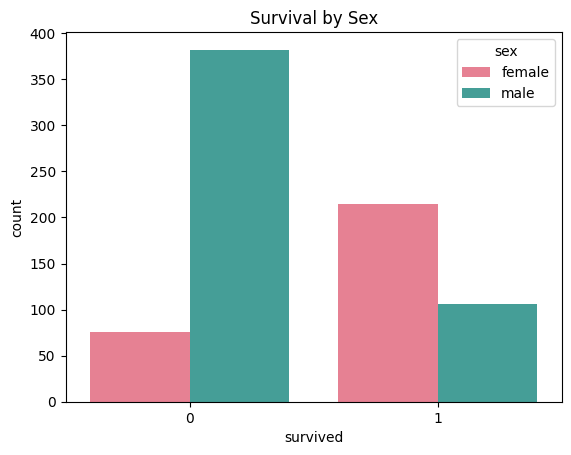

In [30]:
# Analyze survival with respect to 'sex'
print(round((df.groupby('sex')['survived'].value_counts() / len(df) * 100), 1).unstack())

sns.countplot(df, x = 'survived', hue = 'sex', palette='husl')
plt.title('Survival by Sex')
plt.show()

survived     0     1
who                 
child      4.4   6.2
man       46.6  10.9
woman      7.8  24.1


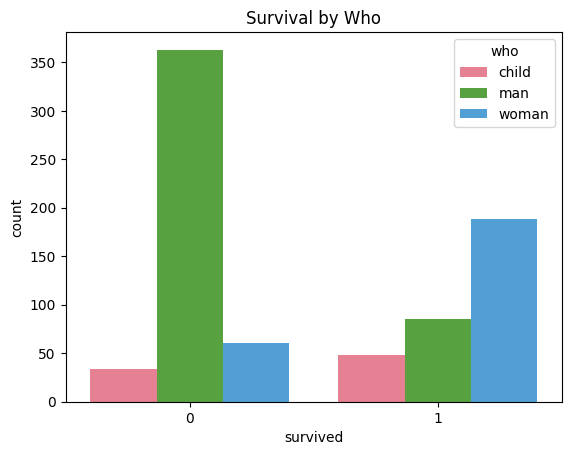

In [31]:
# Analyze survival with respect to 'who'
print(round((df.groupby('who')['survived'].value_counts() / len(df) * 100), 1).unstack())

sns.countplot(df, x = 'survived', hue = 'who', palette='husl')
plt.title('Survival by Who')
plt.show()

survived        0     1
embark_town            
Cherbourg     8.3  11.4
Queenstown    4.9   2.6
Southampton  45.6  27.2


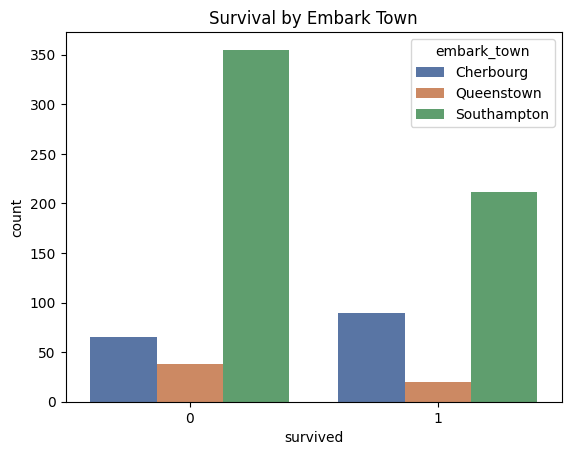

In [32]:
# Analyze survival with respect to 'embark_town'
print(round((df.groupby('embark_town')['survived'].value_counts() / len(df) * 100), 1).unstack())

sns.countplot(df, x = 'survived', hue = 'embark_town', palette='deep')
plt.title('Survival by Embark Town')
plt.show()

survived     0     1
alone               
False     21.2  22.1
True      37.6  19.1


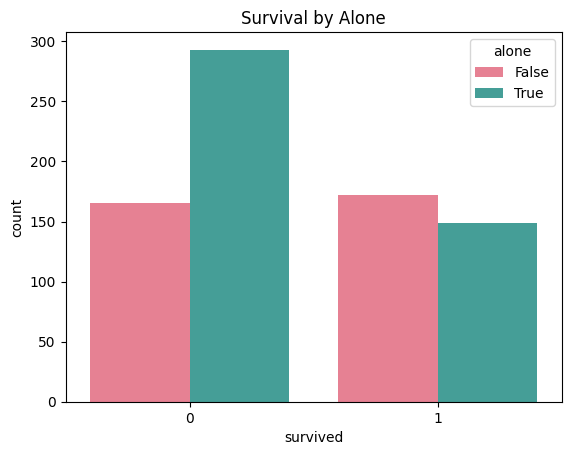

In [33]:
# Analyze survival with respect to 'alone'
print(round((df.groupby('alone')['survived'].value_counts() / len(df) * 100), 1).unstack())

sns.countplot(df, x = 'survived', hue = 'alone', palette='husl')
plt.title('Survival by Alone')
plt.show()

survived       0     1
age_groups            
0-5          1.7   3.9
6-10         1.7   0.9
11-15        1.0   1.4
16-19        5.9   3.9
20-40       36.6  24.3
41-80       11.9   6.9


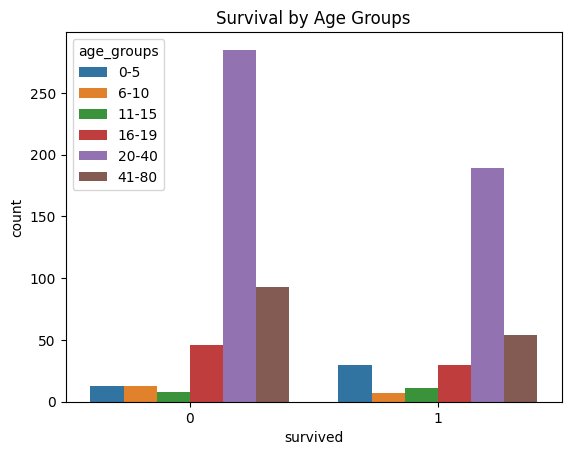

In [34]:
# Analyze survival with respect to 'age_groups'
print(round((df.groupby('age_groups')['survived'].value_counts() / len(df) * 100), 1).unstack())

sns.countplot(df, x = 'survived', hue = 'age_groups')
plt.title('Survival by Age Groups')
plt.show()

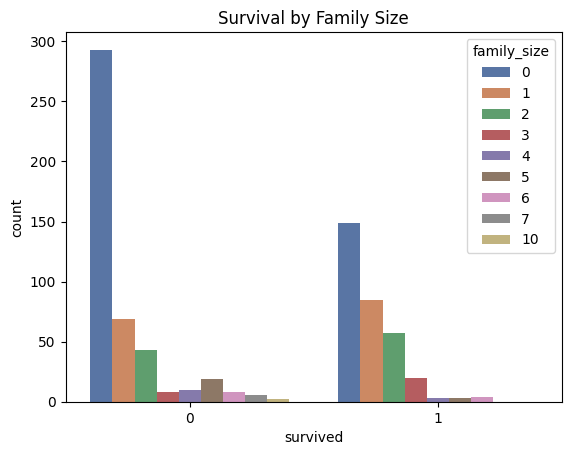

In [35]:
# Analyze survival with respect to 'family_size'
sns.countplot(df, x = 'survived', hue = 'family_size', palette='deep')
plt.title('Survival by Family Size')
plt.show()

### Few Observations:
1. Passengers in third class had lower survival rates compared to first class.
2. Women had higher survival rates than men.
3. Women and children were prioritized in rescue operations.
4. Passengers who paid higher fares had higher survival chances.
5. Age, Family size, and Embark town had less influence on survival.

## Step-08: Multivariate Analysis

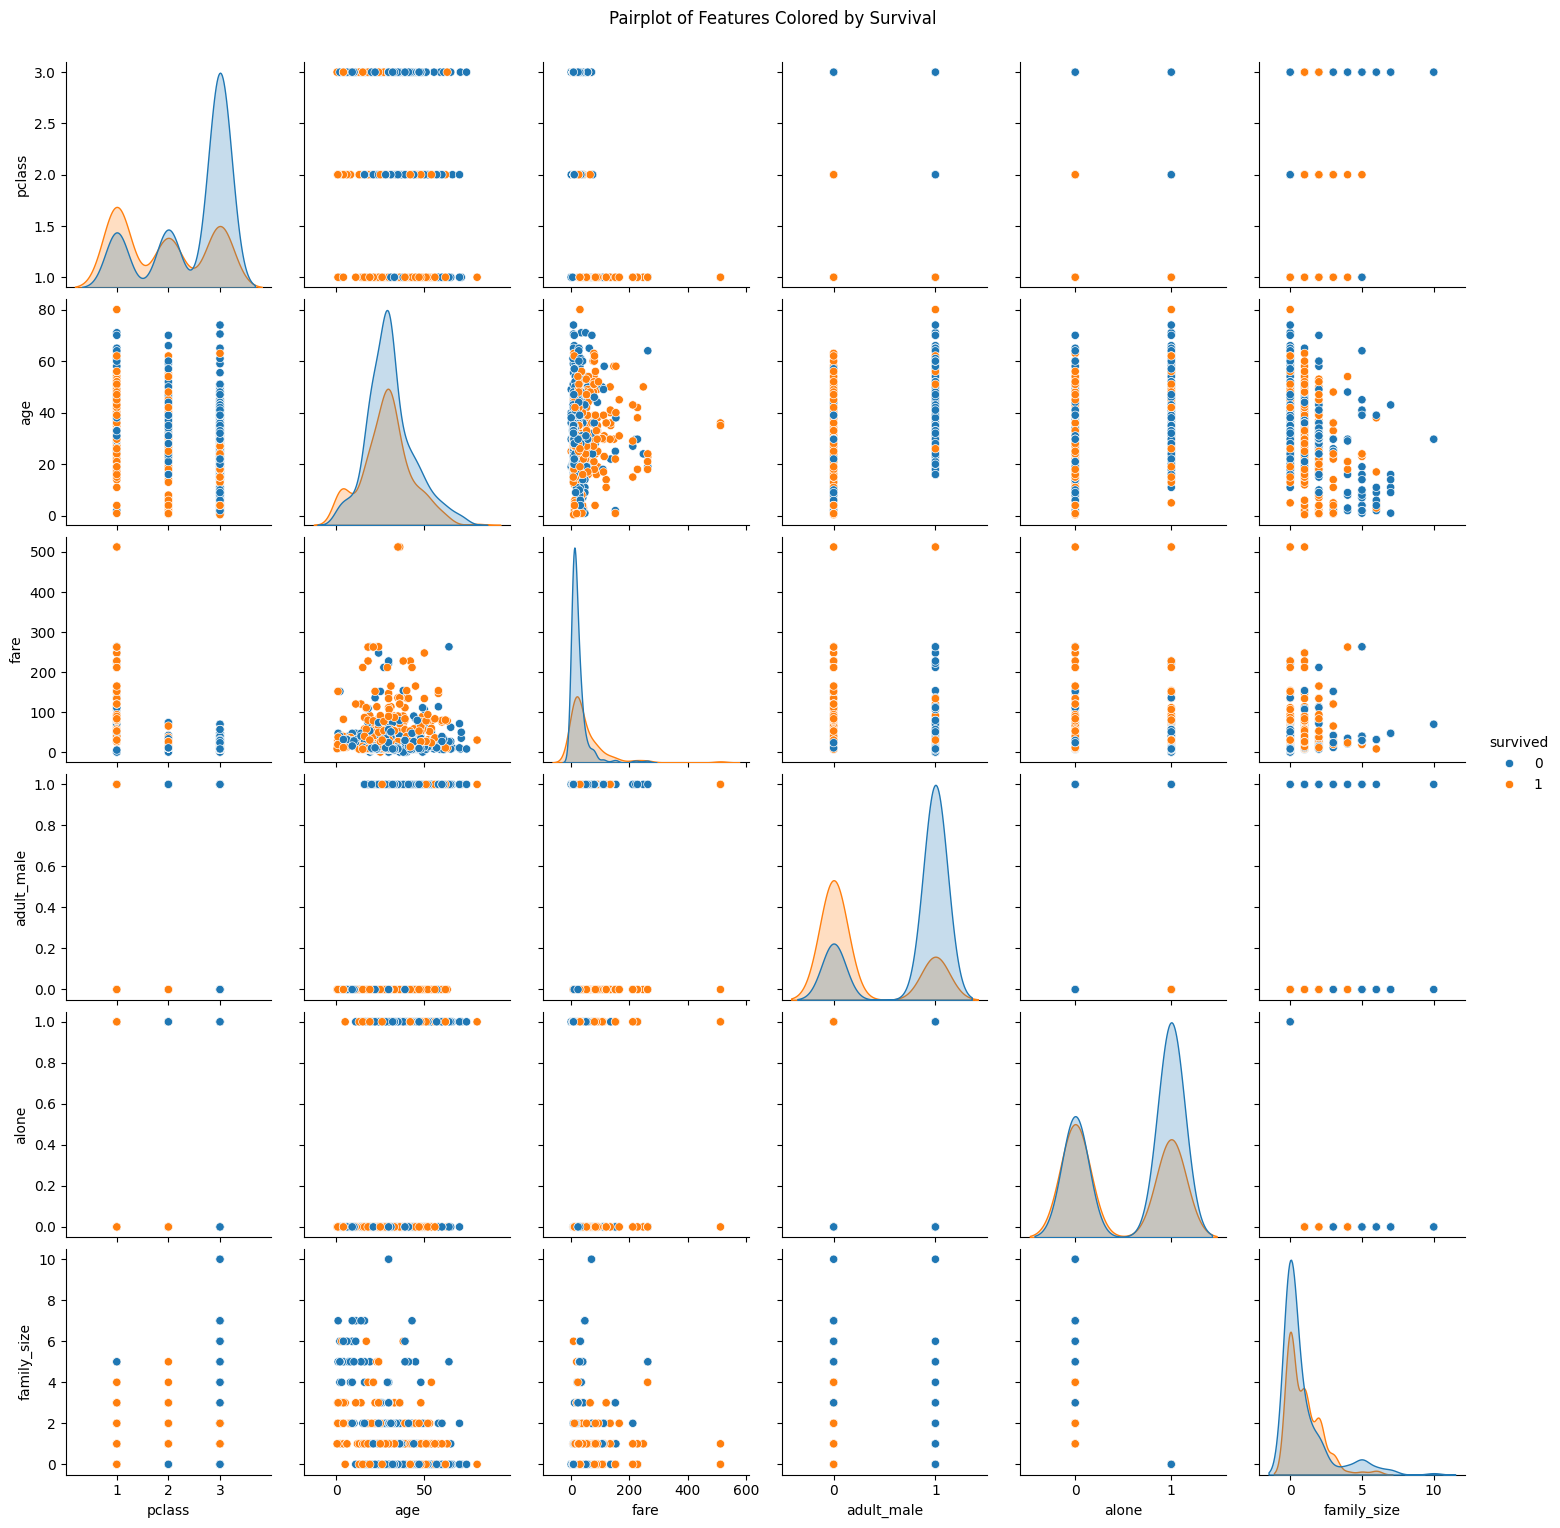

In [36]:
# Create a pairplot of features colored by survival status
sns.pairplot(df, hue = 'survived')
plt.suptitle('Pairplot of Features Colored by Survival', y = 1.02)
plt.show()

             survived    pclass       age      fare  family_size
survived     1.000000 -0.338073 -0.079253  0.247270     0.012947
pclass      -0.338073  1.000000 -0.338689 -0.552466     0.077197
age         -0.079253 -0.338689  1.000000  0.090556    -0.285281
fare         0.247270 -0.552466  0.090556  1.000000     0.192881
family_size  0.012947  0.077197 -0.285281  0.192881     1.000000


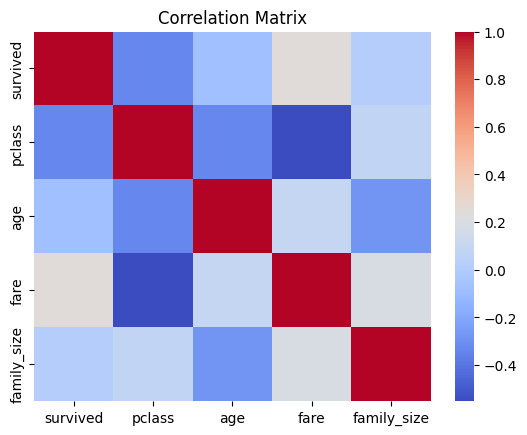

In [37]:
# Compute and display the correlation matrix
corr = df[['survived', 'pclass', 'age', 'fare', 'family_size']].corr()
print(corr)
sns.heatmap(corr, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Few Observations:
1. The survival and pclass shows moderate negative correlation. As the pclass number increases (from 1 to 3), the likelihood of survival tends to decrease.
2. Age has minimal impact on survival.
3. The survival and fare shows a weak positive correlation.
4. Family size has little impact on survival.

## Step-09: Removing Outliers

In [38]:
# Identify and remove outliers in the 'fare' column using the IQR method.
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['fare'] > lower_bound) & (df['fare'] < upper_bound)]

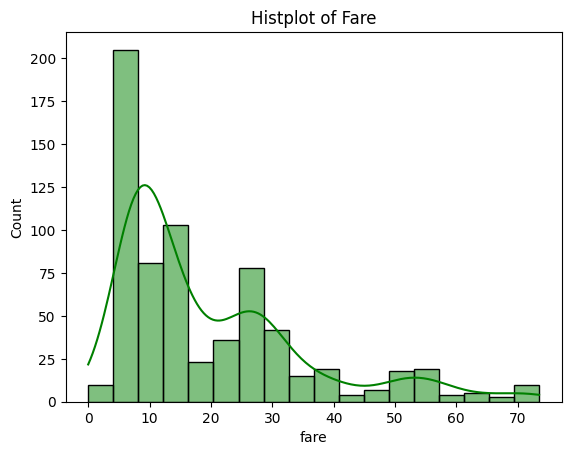

In [39]:
# Analyze the distribution of 'fare' after removing outliers
sns.histplot(df, x = 'fare', kde = 'True', color='green')
plt.title('Histplot of Fare')
plt.show()

In [40]:
# Display the shape of the dataset (rows, columns) after removing outliers
df.shape

(682, 12)

## Key Findings:
1. First-class passengers had higher survival rates compared to other classes.
2. Women were given higher priority in rescue operations than men.
3. Age, Family size, and Embark town had less influence on survival.